<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Recommendation_Engine/MetaPath2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


import os

In [ ]:
# Load the events data
event_df=pd.read_csv('drive/MyDrive/Colab Notebooks/events.csv')
event_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [ ]:
event_df['visitorid'].value_counts()

In [ ]:
# Load the category tree data
category_tree=pd.read_csv('drive/MyDrive/Colab Notebooks/category_tree.csv')

category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
# load item-related datasets
item1=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part1.csv')
item2=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part2.csv')

# Combine the item properties dataframes
item_properties = pd.concat([item1, item2])
item_properties.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


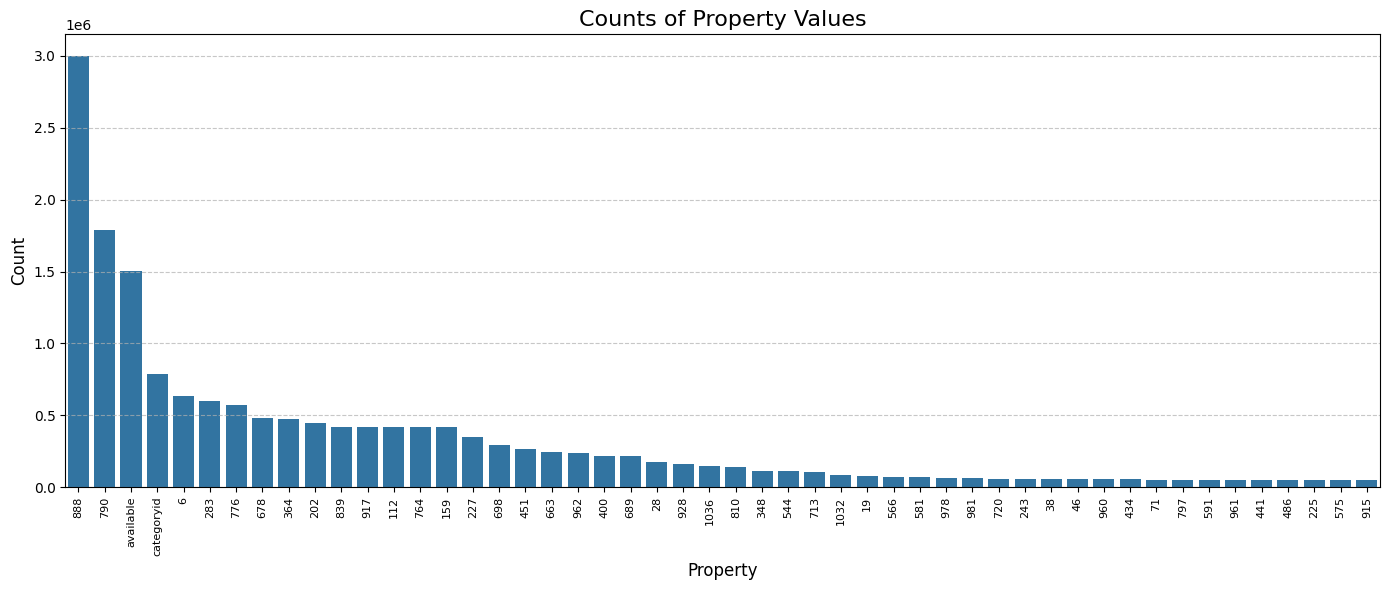

In [ ]:
# Group by 'property' and calculate counts
property_counts = item_properties['property'].value_counts().reset_index()
property_counts.columns = ['property', 'count']

top_50_properties = property_counts.head(50)

# Visualize the counts as a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_50_properties['property'], y=property_counts['count'])
plt.xticks(rotation=90, fontsize=8)
plt.title('Counts of Property Values', fontsize=16)
plt.xlabel('Property', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
property_counts = item_properties['property'].value_counts()
threshold = 0.01 * len(item_properties)
frequent_properties = property_counts[property_counts > threshold].index
filtered_item_properties = item_properties[item_properties['property'].isin(frequent_properties)]


In [ ]:
len(filtered_item_properties['property'].unique())

NameError: name 'filtered_item_properties' is not defined

In [ ]:
len(item_properties['property'].unique())

In [ ]:
filtered_item_properties.shape

In [ ]:
filtered_item_properties['itemid'].nunique()

In [ ]:
filtered_item_properties['property'].value_counts().head(20)

In [ ]:
# Filter for items with at least 'categoryid' OR 'availability'
filtered_items = item_properties[item_properties['property'].isin(['categoryid', 'available'])]

filtered_items.shape

(2291853, 4)

In [ ]:
filtered_items

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1
...,...,...,...,...
9275873,1435460400000,444741,categoryid,511
9275879,1435460400000,97513,categoryid,1385
9275890,1433041200000,356167,available,0
9275892,1439089200000,200211,available,0


In [ ]:
filtered_items['property'].value_counts()

In [ ]:
# Filter for rows where 'property' is either 'categoryid' or 'availability'
filtered_items = item_properties[item_properties['property'].isin(['categoryid', 'available'])]

# Group by 'itemid' and count unique properties
item_property_counts = filtered_items.groupby('itemid')['property'].nunique()

# Filter for items with both properties (count == 2)
items_with_both_properties = item_property_counts[item_property_counts == 2]

# Get the number of such items
num_items_with_both = len(items_with_both_properties)

# Print the result
print(f"Number of items with both categoryid and availability: {num_items_with_both}")

In [ ]:
available_properties = item_properties[item_properties['property'] == 'available']

# Group by 'itemid' and count rows
filtered_items = filtered_items.groupby('itemid').size().reset_index(name='count')

# Sort by count in descending order
filtered_items = filtered_items.sort_values(by='count', ascending=False)

In [ ]:
filtered_items.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1


In [ ]:
duplicates = filtered_items[filtered_items.duplicated(subset=['itemid', 'property', 'value'], keep=False)]
print(duplicates)
print(f"Number of duplicate rows: {len(duplicates)}")

             timestamp  itemid    property value
5        1436065200000  285026   available     0
15       1437274800000  186518   available     0
82       1434250800000  316253   available     1
96       1437274800000  430459   available     0
101      1433041200000  411262   available     0
...                ...     ...         ...   ...
9275856  1438484400000  225378   available     1
9275873  1435460400000  444741  categoryid   511
9275879  1435460400000   97513  categoryid  1385
9275892  1439089200000  200211   available     0
9275897  1436065200000   74745   available     0

[1534714 rows x 4 columns]
Number of duplicate rows: 1534714


In [ ]:
item_properties.shape

In [ ]:
category_tree['parentid'].value_counts()

,count
parentid,
250.0,31
362.0,22
1009.0,22
351.0,19
1259.0,18
...,...
1315.0,1
1671.0,1
44.0,1


In [ ]:
category_tree['categoryid'].value_counts()

,count
categoryid,
761,1
1016,1
809,1
570,1
1691,1
...,...
1140,1
1479,1
83,1


In [ ]:
filtered_items['value'].value_counts()

In [ ]:
# Convert 'value' column in filtered_items to int64 using .loc
filtered_items.loc[:, 'value'] = pd.to_numeric(filtered_items['value'], errors='coerce').astype('Int64')

# Now perform the merge
items_cats = pd.merge(filtered_items, category_tree, how='left', left_on='value', right_on='categoryid')
items_cats

,timestamp,itemid,property,value,categoryid,parentid
0,1435460400000,460429,categoryid,1338,1338.0,1278.0
1,1436065200000,285026,available,0,0.0,605.0
2,1437274800000,186518,available,0,0.0,605.0
3,1433646000000,423682,available,0,0.0,605.0
4,1434250800000,316253,available,1,1.0,854.0
...,...,...,...,...,...,...
2291848,1435460400000,444741,categoryid,511,511.0,724.0
2291849,1435460400000,97513,categoryid,1385,1385.0,1202.0
2291850,1433041200000,356167,available,0,0.0,605.0
2291851,1439089200000,200211,available,0,0.0,605.0


In [ ]:
len(items_cats['itemid'].unique())

417053

In [ ]:
items_cats['categoryid'].value_counts()

,count
categoryid,
0.0,863245
1.0,641420
1147.0,26890
546.0,24885
1613.0,21126
...,...
480.0,1
180.0,1
1341.0,1


In [ ]:
items_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291853 entries, 0 to 2291852
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   timestamp   int64 
 1   itemid      int64 
 2   property    object
 3   value       object
 4   categoryid  object
 5   parentid    object
dtypes: int64(2), object(4)
memory usage: 104.9+ MB


In [ ]:
items_cats['categoryid'] = items_cats['categoryid'].fillna('Unknown')
items_cats['parentid'] = items_cats['parentid'].fillna('Unknown')

In [ ]:
items_cats.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0
categoryid,0
parentid,0


In [ ]:
# Sort by itemid and timestamp
items_cats_sorted = items_cats.sort_values(by=['itemid', 'timestamp'])

# Group by itemid
grouped = items_cats_sorted.groupby('itemid')

# Initialize an empty list to store the results
result_data = []

# Iterate through each group
for itemid, group in grouped:
    # Filter for 'available' property
    available_rows = group[group['property'] == 'available']

    # Iterate through available rows
    for i in range(len(available_rows) - 1):
        # Get current and next row
        current_row = available_rows.iloc[i]
        next_row = available_rows.iloc[i + 1]

        # Create a dictionary to store the new data
        new_row = current_row.to_dict()  # Start with all columns from current_row

        # Add new features
        new_row['from'] = current_row['timestamp']
        new_row['to'] = next_row['timestamp']

        # Determine 'availability' value
        if current_row['value'] == 0 and next_row['value'] == 1:
            new_row['availability'] = 0
        elif current_row['value'] == 1 and next_row['value'] == 0:
            new_row['availability'] = 1

        # Append to the result list
        result_data.append(new_row)

# Create a DataFrame from the result list
result_df = pd.DataFrame(result_data)


In [ ]:
result_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1.0,854.0,1431226800000,1431831600000,1.0
1,1431831600000,1,available,0,0.0,605.0,1431831600000,1432436400000,NaN
2,1432436400000,1,available,0,0.0,605.0,1432436400000,1433041200000,NaN
3,1433041200000,1,available,0,0.0,605.0,1433041200000,1433646000000,NaN
4,1433646000000,1,available,0,0.0,605.0,1433646000000,1434250800000,NaN
...,...,...,...,...,...,...,...,...,...
1086581,1439089200000,466864,available,1,1.0,854.0,1439089200000,1439694000000,1.0
1086582,1439694000000,466864,available,0,0.0,605.0,1439694000000,1440298800000,NaN
1086583,1440298800000,466864,available,0,0.0,605.0,1440298800000,1440903600000,NaN
1086584,1440903600000,466864,available,0,0.0,605.0,1440903600000,1441508400000,NaN


In [ ]:
len(result_df['itemid'].unique())

67001

In [ ]:
result_df['categoryid'].value_counts()

In [ ]:
result_df['parentid'].value_counts()

In [ ]:
result_df.duplicated(subset=['itemid', 'value']).sum()

954188

In [ ]:
result_df.isnull().sum()

,0
timestamp,0
itemid,0
property,0
value,0
categoryid,0
parentid,0
from,0
to,0
availability,914838


In [ ]:
import pandas as pd

# Sort by itemid, from, and to
result_df_sorted = result_df.sort_values(by=['itemid', 'from', 'to'])

# Group by itemid and availability
grouped = result_df_sorted.groupby(['itemid', 'availability'])

# Initialize an empty list to store the processed rows
processed_rows = []

# Iterate through each group
for (itemid, availability), group in grouped:
    # If there are multiple rows with the same availability
    if len(group) > 1:
        # Update the 'to' value of the first row with the 'to' value of the last row
        first_row = group.iloc[0].copy()  # Create a copy to avoid modifying the original DataFrame
        first_row['to'] = group.iloc[-1]['to']
        processed_rows.append(first_row)
    else:
        # If only one row, keep it as is
        processed_rows.append(group.iloc[0])

# Create a new DataFrame from the processed rows
final_df = pd.DataFrame(processed_rows)

# Display the final DataFrame
final_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1.0,854.0,1431226800000,1431831600000,1.0
22,1434250800000,6,available,1,1.0,854.0,1434250800000,1435460400000,1.0
34,1431226800000,15,available,0,0.0,605.0,1431226800000,1431831600000,0.0
42,1436670000000,15,available,1,1.0,854.0,1436670000000,1437274800000,1.0
54,1433041200000,16,available,0,0.0,605.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...,...,...,...
1086539,1433646000000,466858,available,0,0.0,605.0,1433646000000,1434250800000,0.0
1086536,1431831600000,466858,available,1,1.0,854.0,1431831600000,1432436400000,1.0
1086553,1431831600000,466861,available,0,0.0,605.0,1431831600000,1441508400000,0.0
1086552,1431226800000,466861,available,1,1.0,854.0,1431226800000,1442113200000,1.0


In [ ]:
# 1. Extract itemid, categoryid, and parentid from items_cats where property is 'categoryid'
item_category_mapping = items_cats[items_cats['property'] == 'categoryid'][['itemid', 'categoryid', 'parentid']]

# 2. Convert itemid to string for matching
item_category_mapping['itemid'] = item_category_mapping['itemid'].astype(str)
final_df['itemid'] = final_df['itemid'].astype(str)

# 3. Replace categoryid and parentid in final_df using the mapping
final_df = pd.merge(final_df, item_category_mapping[['itemid', 'categoryid', 'parentid']], on='itemid', how='left', suffixes=('', '_new'))
final_df['categoryid'] = final_df['categoryid_new']  # Directly replace categoryid
final_df['parentid'] = final_df['parentid_new']  # Directly replace parentid
final_df = final_df.drop(columns=['categoryid_new', 'parentid_new'])  # Drop temporary columns

# Display the updated final_df
final_df

,timestamp,itemid,property,value,categoryid,parentid,from,to,availability
0,1431226800000,1,available,1,1114.0,113.0,1431226800000,1431831600000,1.0
1,1434250800000,6,available,1,1091.0,573.0,1434250800000,1435460400000,1.0
2,1431226800000,15,available,0,722.0,1110.0,1431226800000,1431831600000,0.0
3,1436670000000,15,available,1,722.0,1110.0,1436670000000,1437274800000,1.0
4,1433041200000,16,available,0,333.0,1497.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...,...,...,...
210806,1433646000000,466858,available,0,1191.0,61.0,1433646000000,1434250800000,0.0
210807,1431831600000,466858,available,1,1191.0,61.0,1431831600000,1432436400000,1.0
210808,1431831600000,466861,available,0,1051.0,955.0,1431831600000,1441508400000,0.0
210809,1431226800000,466861,available,1,1051.0,955.0,1431226800000,1442113200000,1.0


In [ ]:
final_df.shape

(210811, 9)

In [ ]:
item_final = final_df.drop(columns=['property','value','timestamp'])
item_final

,itemid,categoryid,parentid,from,to,availability
0,1,1114.0,113.0,1431226800000,1431831600000,1.0
1,6,1091.0,573.0,1434250800000,1435460400000,1.0
2,15,722.0,1110.0,1431226800000,1431831600000,0.0
3,15,722.0,1110.0,1436670000000,1437274800000,1.0
4,16,333.0,1497.0,1433041200000,1437879600000,0.0
...,...,...,...,...,...,...
210806,466858,1191.0,61.0,1433646000000,1434250800000,0.0
210807,466858,1191.0,61.0,1431831600000,1432436400000,1.0
210808,466861,1051.0,955.0,1431831600000,1441508400000,0.0
210809,466861,1051.0,955.0,1431226800000,1442113200000,1.0


In [ ]:
item_final['categoryid'].value_counts()

In [ ]:
item_final.isnull().sum()

,0
itemid,0
categoryid,0
parentid,0
from,0
to,0
availability,0


In [ ]:
item_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210811 entries, 0 to 210810
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   itemid        210811 non-null  object 
 1   categoryid    210811 non-null  object 
 2   parentid      210811 non-null  object 
 3   from          210811 non-null  int64  
 4   to            210811 non-null  int64  
 5   availability  210811 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.7+ MB


In [ ]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [ ]:
event_df.isnull().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,2733644


In [ ]:
event_df['is_transaction'] = event_df['transactionid'].notnull().astype(int)

In [ ]:
event_df.drop(columns=['transactionid'], inplace=True)

In [ ]:
item_final['itemid'] = item_final['itemid'].astype(str)
item_final['categoryid'] = item_final['categoryid'].astype(str)
item_final['parentid'] = item_final['parentid'].astype(str)
item_final['categoryid'] = item_final['categoryid'].astype(str)

event_df['itemid'] = event_df['itemid'].astype(str)
event_df['visitorid'] = event_df['visitorid'].astype(str)


In [ ]:
len(filtered_items['itemid'].unique())

417053

In [ ]:
merged_df = pd.merge(event_df, item_final, on='itemid', how='left')

In [ ]:
merged_df.isnull().sum()

,0
timestamp,0
visitorid,0
event,0
itemid,0
is_transaction,0
categoryid,1562464
parentid,1562464
from,1562464
to,1562464
availability,1562464


In [ ]:
import pandas as pd

# Convert timestamp columns to datetime for comparison and merging
event_df['timestamp'] = pd.to_datetime(event_df['timestamp'])
item_final['from'] = pd.to_datetime(item_final['from'])
item_final['to'] = pd.to_datetime(item_final['to'])

# Rename columns to avoid conflicts after merging
item_final = item_final.rename(columns={'categoryid': 'item_categoryid', 'parentid': 'item_parentid'})

# Merge event_df and item_final based on 'itemid'
merged_df = pd.merge(event_df, item_final, on='itemid', how='left')

# Filter the merged DataFrame based on timestamp range
filtered_df = merged_df[
    (merged_df['from'] <= merged_df['timestamp']) & (merged_df['timestamp'] <= merged_df['to'])
]

# Select relevant columns and rename them back to original names
event_df = filtered_df[['visitorid', 'timestamp', 'itemid', 'event', 'is_transaction',
                         'item_categoryid', 'item_parentid', 'availability']]
event_df = event_df.rename(columns={'item_categoryid': 'categoryid', 'item_parentid': 'parentid'})

# Display the updated event_df
print(event_df)

        visitorid                     timestamp  itemid event  is_transaction  \
98        1076270 1970-01-01 00:23:53.222147345  262799  view               0   
99        1076270 1970-01-01 00:23:53.222147345  262799  view               0   
143        692195 1970-01-01 00:23:53.223138106  112792  view               0   
146        392042 1970-01-01 00:23:53.223790254   16813  view               0   
147        392042 1970-01-01 00:23:53.223790254   16813  view               0   
...           ...                           ...     ...   ...             ...   
6108754    639019 1970-01-01 00:23:58.400010258   47138  view               0   
6108764    611270 1970-01-01 00:23:58.397455397  432925  view               0   
6108765    611270 1970-01-01 00:23:58.397455397  432925  view               0   
6108774    701750 1970-01-01 00:23:58.399289446  296172  view               0   
6108775    701750 1970-01-01 00:23:58.399289446  296172  view               0   

        categoryid parentid

In [ ]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225358 entries, 98 to 6108775
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   visitorid       1225358 non-null  object        
 1   timestamp       1225358 non-null  datetime64[ns]
 2   itemid          1225358 non-null  object        
 3   event           1225358 non-null  object        
 4   is_transaction  1225358 non-null  int64         
 5   categoryid      1225358 non-null  object        
 6   parentid        1225358 non-null  object        
 7   availability    1225358 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 84.1+ MB


In [ ]:
event_df.isnull().sum()

,0
visitorid,0
timestamp,0
itemid,0
event,0
is_transaction,0
categoryid,0
parentid,0
availability,0


In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
# Initialize a directed graph for heterogeneity
graph = nx.MultiDiGraph()

# --- Add Nodes ---

# 1. Add visitor nodes with their attributes
visitor_data = event_df.groupby('visitorid').agg(
    total_interactions=('visitorid', 'size'),
    transaction_frequency=('is_transaction', 'sum'),
    distinct_items=('itemid', 'nunique')
).reset_index()

for _, row in visitor_data.iterrows():
    graph.add_node(
        row['visitorid'],
        type='visitor',
        total_interactions=row['total_interactions'],
        transaction_frequency=row['transaction_frequency'],
        distinct_items=row['distinct_items']
    )

# 2. Add item nodes with their attributes
item_data = event_df[['itemid', 'availability', 'categoryid', 'parentid']].drop_duplicates(subset=['itemid'])

for _, row in item_data.iterrows():
    graph.add_node(
        row['itemid'],
        type='item',
        availability=row['availability'],
        categoryid=row['categoryid'],
        parentid=row['parentid']
    )

# 3. Add category nodes with their attributes
category_data = event_df[['categoryid', 'parentid']].drop_duplicates(subset=['categoryid'])

for _, row in category_data.iterrows():
    graph.add_node(
        row['categoryid'],
        type='category',
        parentid=row['parentid']
    )

In [ ]:
# Add edges between visitors and items (Visitor-Item Edges)
for _, row in event_df.iterrows():
    graph.add_edge(
        row['visitorid'], row['itemid'],
        type='visitor-item',
        event=row['event'],
        is_transaction=row['is_transaction']
    )

# Add edges between items and categories (Item-Category Edges)
for item_id in item_data['itemid'].unique(): # item_data from previous node creation step
    item_row = item_data[item_data['itemid'] == item_id].iloc[0]
    graph.add_edge(
        item_id, item_row['categoryid'],
        type='item-category',
        availability=item_row['availability']
    )

# Add edges between categories and their parents (Category-Parent Edges)
for category_id in category_data['categoryid'].unique(): # category_data from node creation step
    category_row = category_data[category_data['categoryid'] == category_id].iloc[0]
    graph.add_edge(
        category_id, category_row['parentid'],
        type='category-parent',
        relationship='child_of'
    )

In [ ]:
# Print graph summary
print(f"Name: {graph.name}")
print(f"Type: {type(graph)}")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print(f"Average degree: {sum(dict(graph.degree()).values()) / float(graph.number_of_nodes())}")

Name: 
Type: <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes: 239449
Number of edges: 1258204
Average degree: 10.509160614577635


In [ ]:
from collections import defaultdict

node_type_counts = defaultdict(int)

for node, data in graph.nodes(data=True):  # Iterate with data=True to get node attributes
    node_type = data.get('type', 'unknown')  # Access the 'type' attribute, default to 'unknown' if not found
    node_type_counts[node_type] += 1

# Print the counts
for node_type, count in node_type_counts.items():
    print(f"Node Type: {node_type}, Count: {count}")

Node Type: visitor, Count: 206383
Node Type: item, Count: 31990
Node Type: category, Count: 856
Node Type: unknown, Count: 220


In [ ]:
edge_type_counts = defaultdict(int)

for u, v, data in graph.edges(data=True):  # Iterate with data=True to access edge attributes
    edge_type = data['type']
    edge_type_counts[edge_type] += 1

# Print the counts
for edge_type, count in edge_type_counts.items():
    print(f"Edge Type: {edge_type}, Count: {count}")

Edge Type: visitor-item, Count: 1225358
Edge Type: item-category, Count: 31990
Edge Type: category-parent, Count: 856


Encode the ids if the model fails to deliver. Maybe frequency encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode 'event' in the event_df (visitor-item edge)
event_encoder = LabelEncoder()
event_df['event_encoded'] = event_encoder.fit_transform(event_df['event'])

# 2. Add additional features to the nodes in the graph (visitor nodes)
for visitor_id, group in event_df.groupby('visitorid'):
    total_interactions = len(group)
    transaction_frequency = group['is_transaction'].sum()
    distinct_items = len(group['itemid'].unique())

    graph.nodes[visitor_id]['total_interactions'] = total_interactions
    graph.nodes[visitor_id]['transaction_frequency'] = transaction_frequency
    graph.nodes[visitor_id]['distinct_items'] = distinct_items


In [ ]:
event_df['parentid'].value_counts()

,count
parentid,
250.0,273946
679.0,118838
620.0,60749
955.0,35038
312.0,32049
...,...
1327.0,2
1175.0,1
1632.0,1


In [ ]:
# Example metapath: 'visitor -> item -> category -> visitor'
metapath = [('visitor', 'viewed', 'item'),
            ('item', 'belongs_to', 'category'),
            ('category', 'has', 'item'),
            ('item', 'transaction', 'visitor')]

In [ ]:
# Function to perform random walk following a metapath
def metapath_random_walk(graph, metapath, start_node, length=30):
    walk = [start_node]
    current_node = start_node

    for step in range(length):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        current_node = np.random.choice(neighbors)  # Randomly pick a neighbor based on the metapath
        walk.append(current_node)
    return walk


In [ ]:
from gensim.models import Word2Vec

# Generate random walks
walks = []
for node in graph.nodes:
    walks.append(metapath_random_walk(graph, metapath, node))

# Train Word2Vec (skipgram) model on the random walks
model = Word2Vec(walks, vector_size=128, window=5, min_count=1, workers=4)

# Save model
model.save("metapath2vec_model")


In [ ]:
from sklearn.model_selection import train_test_split

event_df = event_df.sort_values(by=['timestamp'])

# Split based on a percentage (e.g., 80% for training, 20% for testing)
train_data, test_data = train_test_split(event_df, test_size=0.2, shuffle=False)

In [ ]:
# Load model for similarity-based recommendations
model = Word2Vec.load("metapath2vec_model")

# Take a random sample of the test data (e.g., 10% of the test data)
sampled_test_data = test_data.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Generate recommendations for sampled test users
recommendations = {}
for visitor_id in sampled_test_data['visitorid'].unique():
    try:
        visitor_embedding = model.wv[visitor_id]
        similar_items = model.wv.most_similar(visitor_embedding, topn=10)
        recommendations[visitor_id] = [item[0] for item in similar_items]
    except KeyError:
        # Handle cases where visitor ID is not in the model's vocabulary
        recommendations[visitor_id] = []  # Or some default recommendations

# Print the recommendations for the sampled test set
for visitor_id, recommended_items in recommendations.items():
    print(f"Recommendations for visitor {visitor_id}: {recommended_items}")


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid, ParameterSampler
from scipy.stats import randint, uniform

# ... (Your previous code for loading data, creating graph, defining evaluation metrics, etc.) ...


def metapath_random_walk(graph, metapath, start_node, length):
    walk = [start_node]
    current_node = start_node

    for step in range(length):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break
        current_node = np.random.choice(neighbors)  # Randomly pick a neighbor based on the metapath
        walk.append(current_node)
    return walk

def train_and_evaluate_model(params):
    """Trains and evaluates the model with given parameters."""

    # 1. Train Word2Vec model
    walks = []
    for node in graph.nodes:
        walks.append(metapath_random_walk(graph, metapath, node, length=params['walk_length']))

    model = Word2Vec(walks, vector_size=params['vector_size'], window=params['window'],
                     min_count=params['min_count'], workers=4, sg=params['sg'], epochs=params['epochs'])

    # 2. Generate recommendations for sampled test users
    recommendations = {}
    for visitor_id in sampled_test_data['visitorid'].unique():
        try:
            visitor_embedding = model.wv[visitor_id]
            similar_items = model.wv.most_similar(visitor_embedding, topn=10)
            recommendations[visitor_id] = [item[0] for item in similar_items]
        except KeyError:
            recommendations[visitor_id] = []  # Or some default recommendations

    # 3. Evaluate the model using the existing recommendations and relevant items on the entire test set
    evaluation_results = evaluate_recommendations(sampled_test_data, recommendations, k=10)

    return evaluation_results, model


# Define metapath
metapath = [('visitor', 'viewed', 'item'),
            ('item', 'belongs_to', 'category'),
            ('category', 'viewed', 'visitor')]

# Split data
event_df = event_df.sort_values(by=['timestamp'])
train_data, test_data = train_test_split(event_df, test_size=0.2, shuffle=False)
sampled_test_data = test_data.sample(frac=0.1, random_state=42)
relevant_items_sampled = get_relevant_items(sampled_test_data, interaction_threshold=1)

# Define hyperparameter search space
param_dist = {
    'vector_size': randint(32, 128),
    'window': randint(2, 10),
    'min_count': randint(1, 5),
    'sg': randint(0, 2),  # Use randint to sample 0 or 1 for sg
    'epochs': randint(5, 20),
    'walk_length': randint(10, 50)
}

# Perform random search
n_iter = 10  # Number of iterations for random search
best_score = 0
best_params = {}
best_model = None

for i in range(n_iter):
    # Sample random hyperparameters
    params = {k: v.rvs() if hasattr(v, 'rvs') else v for k, v in param_dist.items()}
    print(f"Iteration {i + 1}: Trying parameters: {params}")

    # Train and evaluate model
    results, model = train_and_evaluate_model(params)

    # Update best model if score improves
    score = results['NDCG@K']  # Use your desired metric here
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model
        print(f"New best score: {best_score:.4f} with parameters: {best_params}")

# Print best results
print(f"\nBest NDCG@K: {best_score:.4f} achieved with parameters: {best_params}")

# Save the best model (optional)
best_model.save("best_metapath2vec_model")

In [ ]:
import numpy as np
import pandas as pd

# Precision at K
def precision_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / k

# Recall at K
def recall_at_k(recommended_items, actual_items, k):
    return len(set(recommended_items[:k]) & set(actual_items)) / len(actual_items)

# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(recommended_items, actual_items):
    for rank, item in enumerate(recommended_items, start=1):
        if item in actual_items:
            return 1 / rank
    return 0  # If no relevant item found

# Normalized Discounted Cumulative Gain (NDCG)
def ndcg_at_k(recommended_items, actual_items, k):
    dcg = 0
    idcg = 0
    for rank, item in enumerate(recommended_items[:k], start=1):
        if item in actual_items:
            dcg += 1 / np.log2(rank + 1)

    # Calculate Ideal DCG (IDCG)
    for rank in range(1, k+1):
        if rank <= len(actual_items):
            idcg += 1 / np.log2(rank + 1)

    return dcg / idcg if idcg != 0 else 0

# F1 Score
def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


In [ ]:
def evaluate_recommendations(test_data, recommendations, k=10):
    # Get recommendations for all users in the test data
    all_recommended_items = [recommendations.get(user_id, []) for user_id in test_data['visitorid'].unique()]

    # Get actual items for all users in the test data
    all_actual_items = test_data.groupby('visitorid')['itemid'].apply(list).tolist()

    # Vectorize precision@k calculation
    precision_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / k
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize recall@k calculation
    recall_at_k_values = np.array([
        len(set(recommended[:k]) & set(actual)) / len(actual) if len(actual) > 0 else 0  # Handle empty actual lists
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize MRR calculation
    mrr_values = np.array([
        mean_reciprocal_rank(recommended, actual)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Vectorize NDCG@k calculation
    ndcg_values = np.array([
        ndcg_at_k(recommended, actual, k)
        for recommended, actual in zip(all_recommended_items, all_actual_items)
    ])

    # Aggregate results
    precision_at_k_avg = np.mean(precision_at_k_values)
    recall_at_k_avg = np.mean(recall_at_k_values)
    f1_avg = np.mean([f1_score(p, r) for p, r in zip(precision_at_k_values, recall_at_k_values)])
    mrr_avg = np.mean(mrr_values)
    ndcg_avg = np.mean(ndcg_values)

    return {
        'Precision@K': precision_at_k_avg,
        'Recall@K': recall_at_k_avg,
        'F1 Score': f1_avg,
        'MRR': mrr_avg,
        'NDCG@K': ndcg_avg
    }

In [ ]:
import pandas as pd

def get_relevant_items(test_data, interaction_threshold=1):
    """
    Gets relevant items for each user based on interaction threshold.

    Args:
        test_data (pd.DataFrame): DataFrame containing user-item interactions.
        interaction_threshold (int): Minimum number of interactions to consider an item relevant.

    Returns:
        dict: Dictionary where keys are user IDs and values are lists of relevant item IDs.
    """
    relevant_items = {}
    for user_id, group in test_data.groupby('visitorid'):
        # Filter for 'view' and 'addtocart' events to define relevance
        relevant_items[user_id] = group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts()[group['itemid'][group['event'].map(lambda x: x in ['view', 'addtocart'])] \
            .value_counts() >= interaction_threshold].index.tolist()  # Apply interaction threshold

    return relevant_items

In [ ]:
# Assuming you have 'recommendations', 'test_data', and the necessary functions (get_relevant_items, evaluate_recommendations)

# 1. Get relevant items for the sampled users (from the original test data)
sampled_users = list(recommendations.keys())
sampled_test_data = test_data[test_data['visitorid'].isin(sampled_users)]
relevant_items_sampled = get_relevant_items(sampled_test_data, interaction_threshold=1)  # Adjust threshold if needed

# 2. Evaluate the model using the existing recommendations and relevant items
# Change 'evaluate_model' to 'evaluate_recommendations'
evaluation_results = evaluate_recommendations(sampled_test_data, recommendations, k=10)

# 3. Display results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value:.4f}")